# Analysis of Businesses in Yelp dataset

## 1. Project Objective

Yelp is a crowd-sourced local business review and social networking site.It allows users to choose best business available and also post ratings and review about business. These reviews help business to improve their service and also respond to their customers.

The main objective of this project is to use this data of all the businesses to prepare a insightful analytics and see what are the factors which are helping current businesses to be successful and this will also help future business owners to take important decisions to establish new business. We will explore the features and use machine learning models to predict if a business can survive or not.

## 2. Author

#### Atul Doki - 824400246                                
#### Aditya Ashok - 823793328

## 3. Package requirements

Below are the packages we are going to use in our analysis.
1. pandas = you can find this package in anaconda navigator and install it or you can use python package manager pip,
            'pip install pandas'.Using this library to do exploratory analysis on data.
            
2. matplotlib = run 'conda install matplotlib' if Anaconda is in your system or you can use python package manager                   pip, 'pip install matplotlib'.Using this library to visualize the data.

3. seaborn  = run 'conda install seaborn' if Anaconda is in your system or you can use python package manager pip,
              'pip install seaborn'. Using this library to visualize the data.
              
4. vaex = run 'conda install -c conda-forge vaex' if Anaconda is in your system or you can use python package manager           pip,'pip install vaex'. Using this library to create a 2D interactive plot.

5. sklearn = run 'conda install -c anaconda scikit-learn' if Anaconda is in your system or you can use python package               manager pip, 'pip install scikit-learn'. Using this library to build machine learning models.

6. imblearn = run 'conda install -c conda-forge imbalanced-learn' for Ananconda or you can use python package                       manager pip, 'pip install imblearn'. This package is used to re-sample the data before training to                   reduce the inherent bias in the data.

### Please have these libraries installed before running this project.

## 4. Description of Data

The Yelp dataset is download from kraggle website. It has information of about 1,74,000 businesses in multiple csv files. Below are the attributes of all csv files which are used in this analysis.

The attributes of yelp_business.csv are:                                            
. business_id                                                
. name                                               
. neighborhood                                                    
. address                                                   
. city                                                                  
. state                                                       
. postal_code                                                                             
. latitude                                                                      
. longitude                                                                             
. stars                                                                                                               
. review_count                                                                                                       
. is_open                                                                                                             
. categories

The attributes of yelp_review.css are:                                        
. review_id                                            
. user_id                                               
. business_id                                              
. stars                                         
. date                                                                                   
. text                                                                                   
. useful                                                                                 
. funny                                                                                 
. cool                                                                                   

The attributes of yelp_checkin.csv are:                                              
. business_id                                                 
. weekday                                                     
. hour                                                         
. checkins


### You can find the dataset in the below drive link:
https://drive.google.com/drive/folders/1Te0RnAWhN7vzqONzrhEB3d0XuRR1iQK8?usp=sharing

### Please download the dataset from the drive to your system. Run this file from that directory where the data is in your system or you can change the path of csv files while reading the data.

Original Source: 
https://www.kaggle.com/rksriram312/yelp-dataset-an-exploratory-analysis/data

## 5. Exploratory Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator
import vaex
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics

# Path of the csv files in your system
yelp_business_data = 'yelp_business.csv'
yelp_review_data = 'yelp_review.csv'
yelp_checkin_data = 'yelp_checkin.csv'

In [2]:
# reading data from csv files into dataframes
df_yelp_business= pd.read_csv(yelp_business_data)
df_yelp_review= pd.read_csv(yelp_review_data)
df_yelp_checkin= pd.read_csv(yelp_checkin_data)

In [3]:
# take a peak into the yelp business data
df_yelp_business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
# take a peak into the yelp review data
df_yelp_review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [5]:
# take a peak into the yelp checkin data
df_yelp_checkin.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


### Lets find out if there are any missing values in the data

#### Find missing data in yelp business data

In [6]:
df_yelp_business.isnull().sum()

business_id          0
name                 0
neighborhood    106552
address              0
city                 1
state                1
postal_code        623
latitude             1
longitude            1
stars                0
review_count         0
is_open              0
categories           0
dtype: int64

#### As we can see there are lot of null values in neighborhood column so we could ignore that column in our analysis.

In [7]:
# Dropping neighborhood column
df_yelp_business = df_yelp_business.drop(columns=['neighborhood'])

#### Find missing data in yelp review data

In [8]:
df_yelp_review.isnull().sum()

review_id      0
user_id        0
business_id    0
stars          0
date           0
text           0
useful         0
funny          0
cool           0
dtype: int64

#### Find missing data in yelp checkin data

In [9]:
df_yelp_checkin.isnull().sum()

business_id    0
weekday        0
hour           0
checkins       0
dtype: int64

### Lets visualize number of businesses which are open and closed.

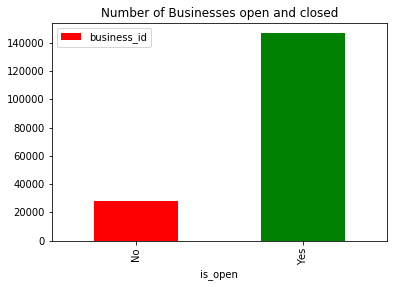

In [10]:
fig, ax = plt.subplots()

# Plotting number of businesses open and closed
df_yelp_business.groupby(['is_open'])['business_id'].count().plot(kind='bar',ax=ax, color=['r','g'])
ax.title.set_text('Number of Businesses open and closed')
ax.set_xticklabels(['No','Yes'])
ax.legend()

### Let's look at the leading business categories in out dataset which are open. A business is linked to multiple categories in our dataset, so we have to do a bit of preprocessing. 

In [11]:
categories = []
def getCategory(row):
    categories.extend(row.split(';'))
    return None


Text(0.5, 1.0, 'Count of businesses by Category')

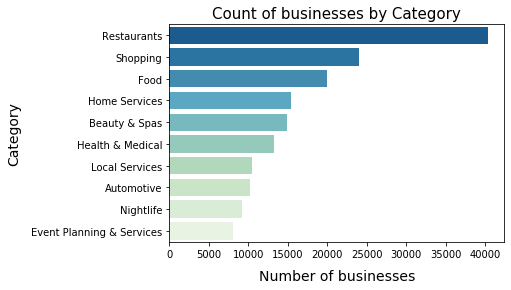

In [12]:
# Filtering businesses which are open
Open_businesses = df_yelp_business[df_yelp_business['is_open'] == 1]

# getting cetegories of businesses
Open_businesses['categories'].apply(lambda row: getCategory(row))

# creating a dataframe of categories and counting number of businesses in each category
df_categories = pd.DataFrame(categories,columns=['categories'])
categories_count = df_categories.categories.value_counts().nlargest(10)

# Plotting Number of businesses in each category
sns.barplot(categories_count.values, categories_count.index, palette=sns.color_palette("GnBu_r", len(categories_count)))
plt.xlabel('Number of businesses', labelpad=10, fontsize=14)
plt.ylabel('Category', labelpad=10, fontsize=14)
plt.title('Count of businesses by Category', fontsize=15)

### We can see from the above bar graph that the highest number of businesses which are open and running are Restaurants followed by shopping. So we can say that if anyone starts a restaurant business then it is likely that the business will be successful.

### Lets visualize the ratings of the businesses

#### Distribution of ratings by businesses

Text(0.5, 1.0, 'Count of businesses against Ratings')

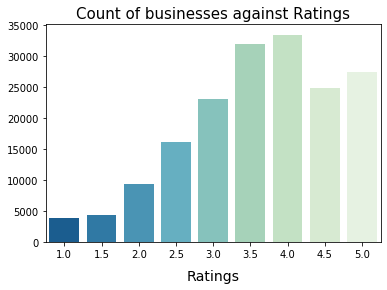

In [13]:
# Grouping businesses as per the rating
group_ratings_count = df_yelp_business.stars.value_counts()

# Plotting number of businesses against rating
sns.barplot(group_ratings_count.index, group_ratings_count.values, palette=sns.color_palette("GnBu_r", len(group_ratings_count)))
plt.xlabel('Ratings', labelpad=10, fontsize=14)
plt.title('Count of businesses against Ratings', fontsize=15)

#### Number of businesses which are open with below or above star rating 3.

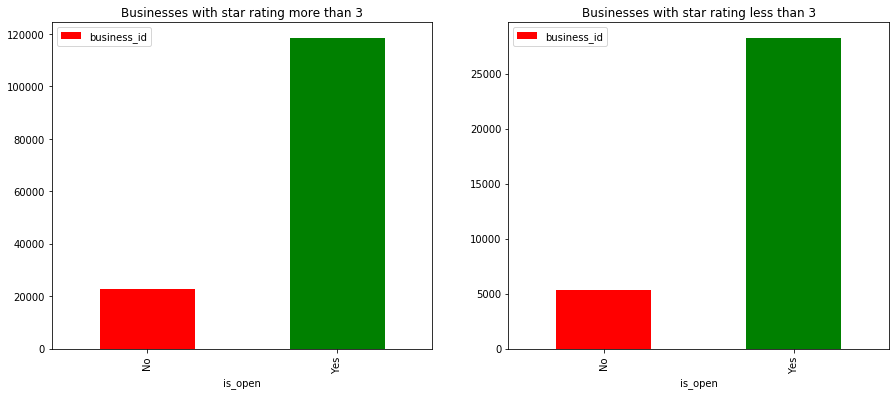

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
ax1.title.set_text('Businesses with star rating more than 3')
ax2.title.set_text('Businesses with star rating less than 3')

# plotting number of businesses with rating above 3 and counting how many are open and closed
df_yelp_business[df_yelp_business.stars >= 3].groupby(['is_open'])['business_id'].count().plot(kind='bar',ax=ax1,color=['r','g'])
ax1.set_xticklabels(['No','Yes'])
ax1.legend()

# plotting number of businesses with rating below 3 and counting how many are open and closed
df_yelp_business[df_yelp_business.stars < 3].groupby(['is_open'])['business_id'].count().plot(kind='bar',ax=ax2, color=['r','g'])
ax2.set_xticklabels(['No','Yes'])
ax2.legend()

### We can see from the above graphs that customer ratings can play a good role to make a business successful. There are around 1.15 lac businesses i.e more than 60% of total businesses which has star rating more than 3 and are open but there are also 26,000 businesses which is comparativelty less, with star rating less than 3 and are open due to some other factors which can be regular customers or the business is setup in a prime location.

### Lets visualize the businesses in different locations

#### Distribution of businesses in different locations.

In [15]:
# Reading data into vaex dataframe
vaex_df_yelp_business = vaex.from_pandas(df_yelp_business)

In [16]:
# interactive plot to see how the businesses are spread out
vaex_df_yelp_business.plot_widget(vaex_df_yelp_business.longitude, 
               vaex_df_yelp_business.latitude, 
               shape=512, 
               limits='minmax')

PlotTemplate(components={'main-widget': VBox(children=(VBox(children=(Figure(axes=[Axis(color='#666', grid_col…

Plot2dDefault(w=None, what='count(*)', x='longitude', y='latitude', z=None)

#### Top 10 states with highest number of businesses

Text(0.5, 1.0, 'Count of businesses against States')

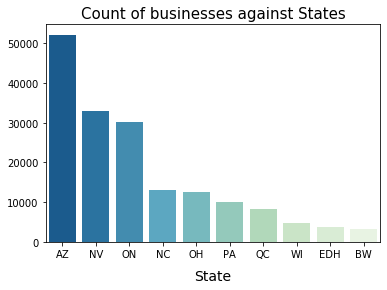

In [17]:
# calculating top 10 states with highest number of businesses
group_state_count = df_yelp_business.state.value_counts().nlargest(10)

# plotting top 10 states with highest number of businesses
sns.barplot(group_state_count.index, group_state_count.values, palette=sns.color_palette("GnBu_r", len(group_state_count)))
plt.xlabel('State', labelpad=10, fontsize=14)
plt.title('Count of businesses against States', fontsize=15)

### We can see in the graph there are some prime locations where there are highest number of businesses running. People always look for best locations for entertainment . So a business at these locations can be successful as more customers will visit there.

### Lets Visualize how number of checkin's affect a business

In [18]:
# calculating number of checkins for each business
check_in_count = df_yelp_checkin.groupby('business_id')['checkins'].sum().reset_index()

In [19]:
# Merging the number of checkins columns to the yelp business data
df_yelp_business = pd.merge(df_yelp_business, check_in_count, on='business_id',how='outer')

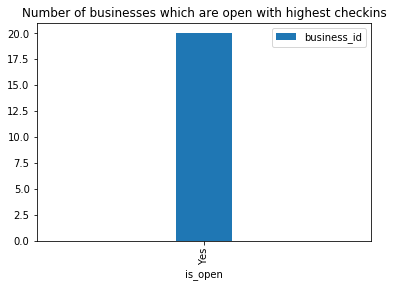

In [20]:
# Plotting number of businesses with highest checkins which are open
fig, ax = plt.subplots()
df_yelp_business.nlargest(20, 'checkins').groupby('is_open')['business_id'].count().plot(kind='bar',width=0.1,ax=ax)
ax.set_title('Number of businesses which are open with highest checkins')
ax.set_xticklabels(['Yes','No'])
ax.legend()

### As we can see the top 20 businesses with highest number of checkins are open and running. So number of checkins i.e numbers of customers visiting the store can be one of the factor for the success of business.

### Lets see how reviews of the customers affect a business

#### Top 10 businesses with highest number of reviews

Text(0.5, 1.0, 'Rating against Business')

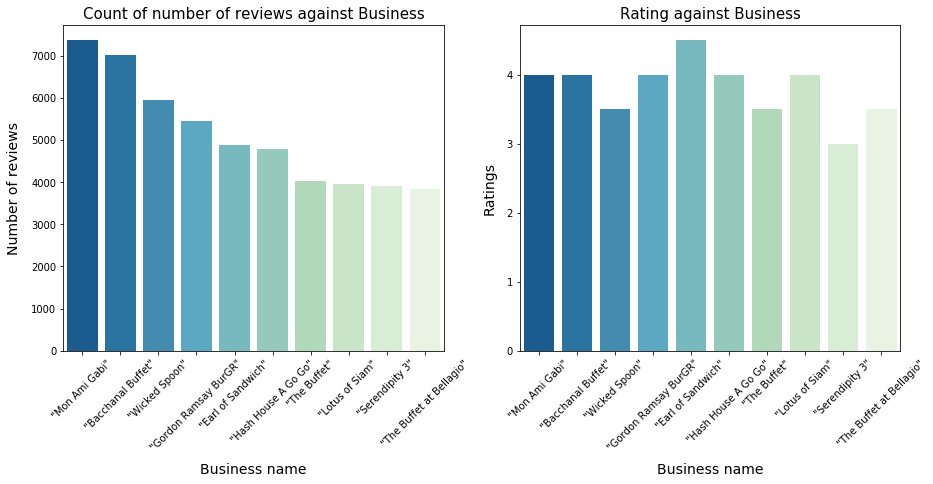

In [21]:
# calulating number of reviews given by users for each business.
user_review_count = df_yelp_review.business_id.value_counts().reset_index().rename(columns={"index":"business_id","business_id":"number_of_reviews"})

# merging number of reviews column to yelp business data
df_yelp_business = pd.merge(df_yelp_business, user_review_count, on='business_id',how='outer')

# getting top 10 businesses with highest number of reviews
top_business_reviews = df_yelp_business.nlargest(10,'number_of_reviews')

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))

# Plotting top 10 businesses with number of reviews
sns.barplot(top_business_reviews.name, top_business_reviews.number_of_reviews, palette=sns.color_palette("GnBu_r", len(top_business_reviews)), ax=ax1)
ax1.set_xlabel('Business name', labelpad=10, fontsize=14)
ax1.set_ylabel('Number of reviews', labelpad=10, fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Count of number of reviews against Business', fontsize=15)

# Plotting top 10 businesses with highest number of reviews against ratings
sns.barplot(top_business_reviews.name, top_business_reviews.stars, palette=sns.color_palette("GnBu_r", len(top_business_reviews)), ax=ax2)
ax2.set_xlabel('Business name', labelpad=10, fontsize=14)
ax2.set_ylabel('Ratings', labelpad=10, fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_title('Rating against Business', fontsize=15)

### We can see from the above graph that all the 10 businesses with highest number of reviews have a very good star rating above 3. Reviews of customers help businesses improve their service and it also attracts more customers to visit.

### Now, we shall build a model to find answers to the question at hand. 

### In our exploratory analysis, we came across the 'is_open' feature which defines whether a business is open or closed. Where 1 signifies open and 0 signifies closed. Intuitively, this is a classification problem. 

### We observed that the number of open businesses greatly outweighs the number of closed businesses. 

### Therefore, we have selected features that would impact the status of a business. These features are listed in cols. We have proved that these features do have an effect on how successfully a business is run in the exploratory analysis above. 
### Now we will figure out if they have an effect on closure of a business.

### We have decided to use Logistic regression first, then move Decision trees and then Random forest which is an Ensemble model.

## 6. Building models

In [22]:
df_yelp_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'checkins', 'number_of_reviews'],
      dtype='object')

### Features we have finalized based on our exploratory analysis

In [23]:
cols = ['latitude',
        'longitude',
        'stars',
        'checkins',
        'number_of_reviews']

In [24]:
X = df_yelp_business.loc[:,cols]
y = df_yelp_business['is_open']

In [25]:
X.fillna(0, inplace = True)

### Splitting the data into test and train

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state = 42)

### SMOTE stands for Synthetic Minority Over-sampling Technique.
### We are using to SMOTE to offset the initial bias in the dataset which is towards businesses being open, by oversampling the minority data, i.e., closed businesses. 

### Basically, this helps use train the model in such a way that it is not biased to predict that a business would be open.

In [27]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(train_X, train_y)

In [28]:
X_res = pd.DataFrame(X_res,columns = train_X.columns.tolist())
y_res = pd.DataFrame(y_res)
test_X = pd.DataFrame(test_X)
test_y = pd.DataFrame(test_y)

### Logistic regression

In [29]:
L = [0.0001,0.001,0.01,0.1,1,10]

accuracy = {}
for i in L:
    LR = LogisticRegression(C=i)
    LR.fit(X_res,np.ravel(y_res))
    pred_y = LR.predict(test_X)
    
    accuracy[i] = 100*accuracy_score(test_y,pred_y)

In [30]:
accuracy

{0.0001: 54.73449046227874,
 0.001: 55.54600828702908,
 0.01: 55.637662064883244,
 0.1: 55.649118787115,
 1: 55.649118787115,
 10: 55.649118787115}

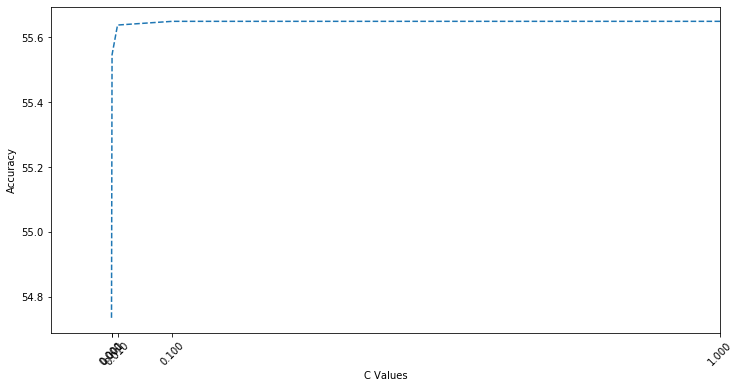

In [31]:
plt.figure(figsize=(12,6))
plt.plot( list(accuracy.keys()), list(accuracy.values()), '--')
plt.xticks(list(accuracy.keys()))
plt.xticks(rotation=45)
plt.xlim(-0.1,1)
plt.xlabel("C Values")
plt.ylabel("Accuracy");

#### Using a lower C value to increase regularization, in-turn decreasing the chance of overfitting

In [32]:
%%time
LR = LogisticRegression(C=0.0001)
LR.fit(X_res,np.ravel(y_res))
pred_y = LR.predict(test_X)

CPU times: user 843 ms, sys: 19.6 ms, total: 863 ms
Wall time: 549 ms


In [33]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("Precision: ",metrics.precision_score(test_y, pred_y))
print("Recall: ",metrics.recall_score(test_y, pred_y))
print("F1 score: ",metrics.f1_score(test_y, pred_y))

Accuracy: 0.5473449046227874
Precision:  0.8677929155313352
Recall:  0.5434441335062453
F1 score:  0.6683455049106019


### Decision trees

In [34]:
%%time
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_res, y_res)

CPU times: user 1.78 s, sys: 30.5 ms, total: 1.81 s
Wall time: 1.88 s


In [35]:
pred_y = clf.predict(test_X)

In [36]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_y))
print("Precision: ",metrics.precision_score(test_y, pred_y))
print("Recall: ",metrics.recall_score(test_y, pred_y))
print("F1 score: ",metrics.f1_score(test_y, pred_y))

Accuracy: 0.704072864753394
Precision:  0.8521222620962752
Recall:  0.7833367460696653
F1 score:  0.8162829844235283


#### Lets visualize which feature was weighed more for predicting in classifier

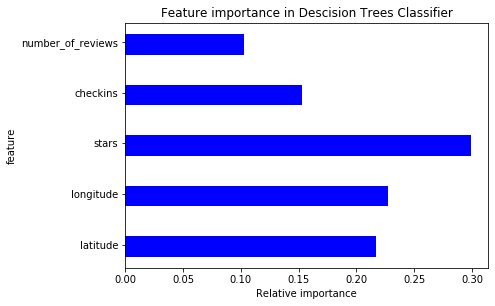

<Figure size 360x360 with 0 Axes>

In [37]:
y = clf.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y))
ax.barh(ind, y, width, color= 'blue')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(cols, minor=False)
plt.title('Feature importance in Descision Trees Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### Random forest - Ensemble model

In [38]:
%%time
randomforest = ensemble.RandomForestClassifier()
randomforest = ensemble.RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
randomforest = randomforest.fit(X_res, np.ravel(y_res))

CPU times: user 1min 5s, sys: 1.11 s, total: 1min 6s
Wall time: 1min 13s


In [39]:
pred_rf = randomforest.predict(test_X)

In [40]:
print("Accuracy:",metrics.accuracy_score(test_y, pred_rf))
print("Precision: ",metrics.precision_score(test_y, pred_rf))
print("Recall: ",metrics.recall_score(test_y, pred_rf))
print("F1 score: ",metrics.f1_score(test_y, pred_rf))

Accuracy: 0.770961028049875
Precision:  0.8525972019947924
Recall:  0.8790753759697859
F1 score:  0.8656338564595446


#### Lets visualize which feature was weighed more for predicting in classifier

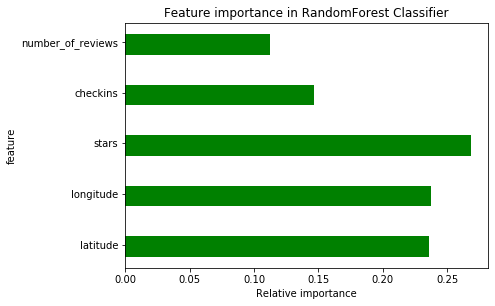

<Figure size 360x360 with 0 Axes>

In [42]:
y = randomforest.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y))
ax.barh(ind, y, width, color= 'green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(cols, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

### Comparison of models used

I. Logistic regression
    
    1. Training Time - 863 s
    2. Accuracy - 54.73%
    3. Precision - 86.78%
    4. Recall - 54.34%
    5. F1 score - 66.83%
    
II. Decision trees
    
    1. Training Time - 1.81 s
    2. Accuracy - 70.40%
    3. Precision - 85.21%
    4. Recall - 78.33%
    5. F1 score - 81.62%
    
III.  Random Forest

    1. Training Time - 1 min 6 s
    2. Accuracy - 77.09%
    3. Precision - 85.25%
    4. Recall - 87.90%
    5. F1 score - 86.56%

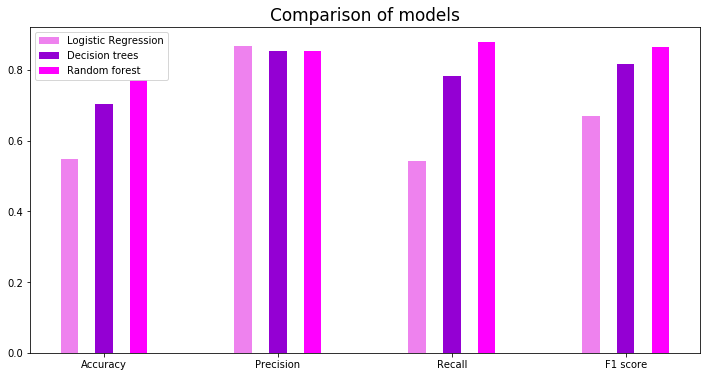

In [43]:
lr = {"Accuracy": 0.547, "Precision": 0.867, "Recall": 0.543, "F1 score": 0.668}
dt = {"Accuracy": 0.704, "Precision": 0.852, "Recall": 0.782, "F1 score": 0.816}
rf = {"Accuracy": 0.770, "Precision": 0.852, "Recall": 0.878, "F1 score": 0.865}

X = np.arange(len(lr))
plt.figure(figsize=(12,6))
ax = plt.subplot(111)

ax.bar(X-0.2, lr.values(), width=0.1, color='violet', align='center')
ax.bar(X, dt.values(), width=0.1, color='Darkviolet', align='center')
ax.bar(X+0.2, rf.values(), width=0.1, color='magenta', align='center')
plt.legend(('Logistic Regression','Decision trees', 'Random forest'))
plt.xticks(X, lr.keys())
plt.title("Comparison of models", fontsize=17)
plt.show()

## 7. Learnings

To acheive the project objective we performed an exploratory analysis on the data. This analysis guided us towards finding the influential factors of a business that represents the state of the business. Filtering through all the columns of the data we decided the following factors based on analysis:

1. Latitude
2. Longitutde
3. Stars
4. Check-ins
5. Number of reviews

By analyzing the location of a business, we discovered that a business is more likely to succeed when it is located in a hotspot in a given region. If a business is situated outside of the hotspots, its likelihood of success greatly reduces.

Stars are the ratings the business receives on Yelp. Customers of that business will provide a rating out of five stars, which depends on their personal experience and is very subjective. This provides us with a yardstick to compare businesses and establish how good or bad it is doing.

Check-ins are the number of people that visit the business.

Number of reviews is basically the number of reviews a business receives on Yelp.

#### We learned to navigate the dataset and filter out the unnecessary information that would not help us gain a better understanding as to what factors affect the closure or success of a business.

Next step was to choose appropriate models to build to acheive the objective. 

On investigation of the data we found that the 'is_open' feature can be used to classify our models. Hence, we decided to classification machine learning models and compare how they performed.

Before we train out models on our data, we observed that the data has a class-imbalance, i.e., majority of the businesses in the data are open for business, which is practically sound. But, we did not want our prediction models to suffer based on this bias. By using SMOTE, which is a sampling technique, we reduced the inherent bias of the data.

Models used: 
1. Logistic regression
2. Decision trees
3. Random forest

We found that random forest outperformed both decision trees and logistic regression in terms of accuracy. Random forest acheived the highest accuracy, followed by decision trees and then logistic regression.

On analyzing the feature importances for both decision trees and random forest we see that 'Stars' is the most important feature, followed by 'Latitude' & 'Longitude', 'Check-ins' and then 'number of reviews'.

#### We learned how to use machine learning algorithms identify the important features. We also learned how to use SMOTE, a sampling technique and how to apply the models mentioned previously.

## 8. Future Improvements

We noticed that the yelp_review.csv contains all the reviews that a certain business receives. We can use the words used by the users in their reviews of the place to determine whether the business is doing good or bad. Depending on the choice of words and their frequency we can extrapolate the health of the business, which can be another factor to incorporate into our models. This would require some expertise in the field of Natural Language Processing.